In [35]:
import pandas as pd
import csv
import sys, os
sys.path.insert(1, '/workspace/Deep SVDD/')
sys.path.insert(1, '/workspace/')
os.chdir('/workspace/Deep SVDD/')

In [36]:
with open('/anomaly_newtype/outside_r_idx.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

idx_list = []
for i in data[0]:
    idx_list.append(int(''.join(filter(str.isdigit, i))))

temp = pd.read_csv('/Final_data/train_data.csv')
temp = temp.iloc[:, 2:]
temp = temp.fillna(0)
res = temp.loc[idx_list]

In [50]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(res)
x = pd.DataFrame(x, columns=res.columns)

[[ 2.99915147e-01  2.99083674e-01  2.99083674e-01  2.99125144e-01
  -8.67361738e-19  1.48235275e-01  2.32341601e-01  8.32356727e-02
   2.91284363e-01  3.23746811e-02  1.84889795e-01  5.14404187e-02
   2.83264872e-01  5.78157666e-02  1.04494695e-01  3.45469825e-02
   2.29872532e-01  1.28318706e-01  2.85974712e-01  1.23112507e-01
   2.87041524e-01  1.14559626e-01  2.78605317e-01 -0.00000000e+00
  -2.22054906e-02 -2.22054906e-02]
 [ 8.52425914e-02  7.41960172e-02  7.41960172e-02  7.80413852e-02
  -0.00000000e+00  1.40768380e-01  1.59149475e-01  6.29713943e-02
   1.02137858e-01 -2.40317243e-01 -2.11655648e-01  6.51913748e-02
   8.29427404e-02  2.70918091e-01  2.52027889e-01  3.55602529e-02
   1.01310955e-01 -3.84223741e-01 -1.15430571e-01 -3.86032432e-01
  -1.16461360e-01 -3.91849262e-01 -1.32640524e-01 -0.00000000e+00
  -2.82216726e-01 -2.82216726e-01]]
size
cpn_use_cnt_mean


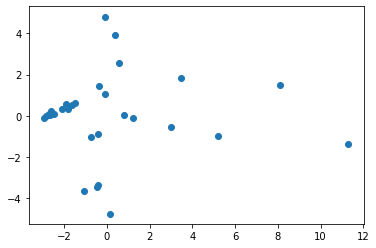

In [58]:
from sklearn.decomposition import PCA
import seaborn as sns 
import matplotlib.pyplot as plt 

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
col = x.columns

print(pcamodel.components_)
for i in pcamodel.components_:
    print(col[i.argmax()])
    
plt.scatter(pca[:, 0], pca[:, 1])

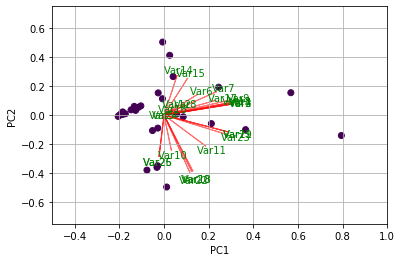

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = res
y = [1] * len(res)
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-0.5,1)
plt.ylim(-0.75,0.75)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [64]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

model = PCA(n_components=6).fit(res)
X_pc = model.transform(res)

n_pcs= model.components_.shape[0]

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = res.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
print(dic)

{'PC0': 'ord_price_sum', 'PC1': 'diff_time_sum', 'PC2': 'diff_time_mean', 'PC3': 'ord_price_mean', 'PC4': 'item_quantity_sum', 'PC5': 'mem_duplicate_sum'}


따라서 새로운 이상치에서 PCA 분석 결과 제일 중요한 value top 5는 ord_price_sum / diff_time_sum / ord_price_mean / item_quantity_sum / mem_duplicate_sum이다. 우리의 원래 이상치에서 위 variable들의 평균을 살펴보고 이를 새로운 이상치들과 비교하면서 우리가 발견한 새로운 이상치가 어떤 특성을 가지고 있는지 역추적해보자.